# Dataset_1

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
data_1 = pd.read_csv('dataset_1.csv')

In [2]:
#Converts each categorical data into one-hot, supllied a data. 
def one_hot(dataset):
    dataset_hot = dataset.copy()
    for column in dataset_hot:
        if column != "adsorption_energy" and type(dataset_hot[column][0])==type('str'):
            onehots = pd.get_dummies(dataset_hot[column], column, drop_first=True, dtype=int)
            dataset_hot = pd.concat([dataset_hot.drop(column, axis=1), onehots], axis=1)
    return dataset_hot

In [3]:
#Does max-min normalization for all numerical attributes. 
def scale_dataset(dataset):
    dataset_scaled = dataset.copy()
    for column in dataset_scaled:
        if column != "adsorption_energy" and type(dataset_scaled[column][0])!=type('str') and type(dataset_scaled[column][0])!=np.bool_:
            min = dataset_scaled[column].min()
            max = dataset_scaled[column].max()
            if min != max:
                dataset_scaled[column]= (dataset_scaled[column] - min) / (max - min)
    return dataset_scaled

In [4]:
data_1 = one_hot(data_1)
data_1 = scale_dataset(data_1)
data_1.head()

adsorption_energy  adsorbate_num_atoms  atomic_num_1  atomic_num_2  \
0              -4.29             0.000000           0.0             0   
1              -0.56             0.045455           0.0             0   
2              -3.14             0.000000           0.0             0   
3              -0.50             0.045455           0.0             0   
4              -1.67             0.045455           0.0             0   

   atomic_num_3  atomic_num_4  atomic_num_5  atomic_num_6  atomic_num_6.1  \
0             0             0           0.0           0.0             0.0   
1             0             0           0.0           0.0             0.0   
2             0             0           0.0           0.0             0.0   
3             0             0           0.0           0.0             0.0   
4             0             0           0.0           0.0             0.0   

   atomic_num_8  ...  adsorbate_connectivity_smiles_[O][C][C][C][O]  \
0          0.25  ...                                            0.0   
1          0.50  ...                                            0.0   
2          0.25  ...                                            0.0   
3          0.50  ...                                            0.0   
4          0.50  ...                                            0.0   

   adsorbate_connectivity_smiles_[O][C][C][O]  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   adsorbate_connectivity_smiles_[O][C][O]  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   adsorbate_connectivity_smiles_[O][C][S]  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   adsorbate_connectivity_smiles_[O][N][N]O  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   adsorbate_connectivity_smiles_[O][O]  adsorbate_connectivity_smiles_[P]  \
0                                   0.0                                0.0   
1                                   1.0                                0.0   
2                                   0.0                                0.0   
3                                   1.0                                0.0   
4                                   1.0                                0.0   

   adsorbate_connectivity_smiles_[S]  adsorbate_connectivity_smiles_[Si]  \
0                                0.0                                 0.0   
1                                0.0                                 0.0   
2                                0.0                                 0.0   
3                                0.0                                 0.0   
4                                0.0                                 0.0   

   adsorbate_connectivity_smiles_[Zn]  
0                                 0.0  
1                                 0.0  
2                                 0.0  
3                                 0.0  
4                                 0.0  

[5 rows x 509 columns]

In [5]:
from sklearn.manifold import TSNE

features = data_1.drop("adsorption_energy", axis='columns')  

tsne = TSNE(n_components = 2, random_state = 0)
projections = tsne.fit_transform(features)

fig1 = px.scatter(
    projections, x=0, y=1,
    color = data_1['adsorption_energy'], labels={'color':'adsorption_energy'},
    width=1000, height=650
)             

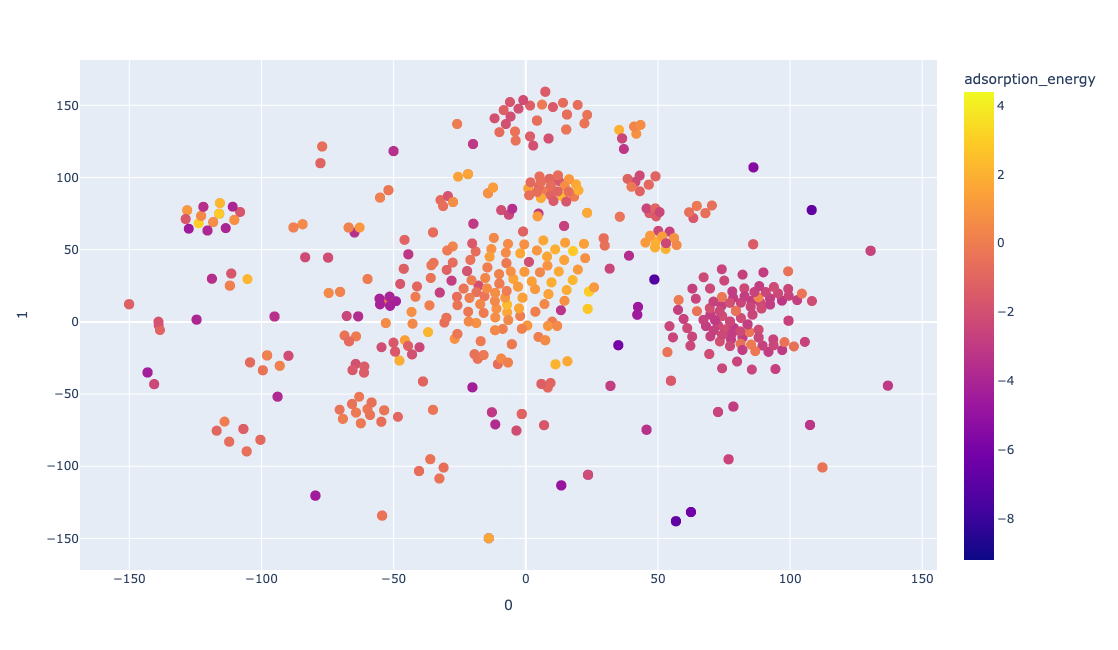

In [6]:
fig1.update_traces(marker=dict(size=10))

In [7]:
tsne = TSNE(n_components = 3, random_state = 0)
projections = tsne.fit_transform(features)

fig2 = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color = data_1['adsorption_energy'], labels={'color':'adsorption_energy'},
    width=1000, height=800
)             

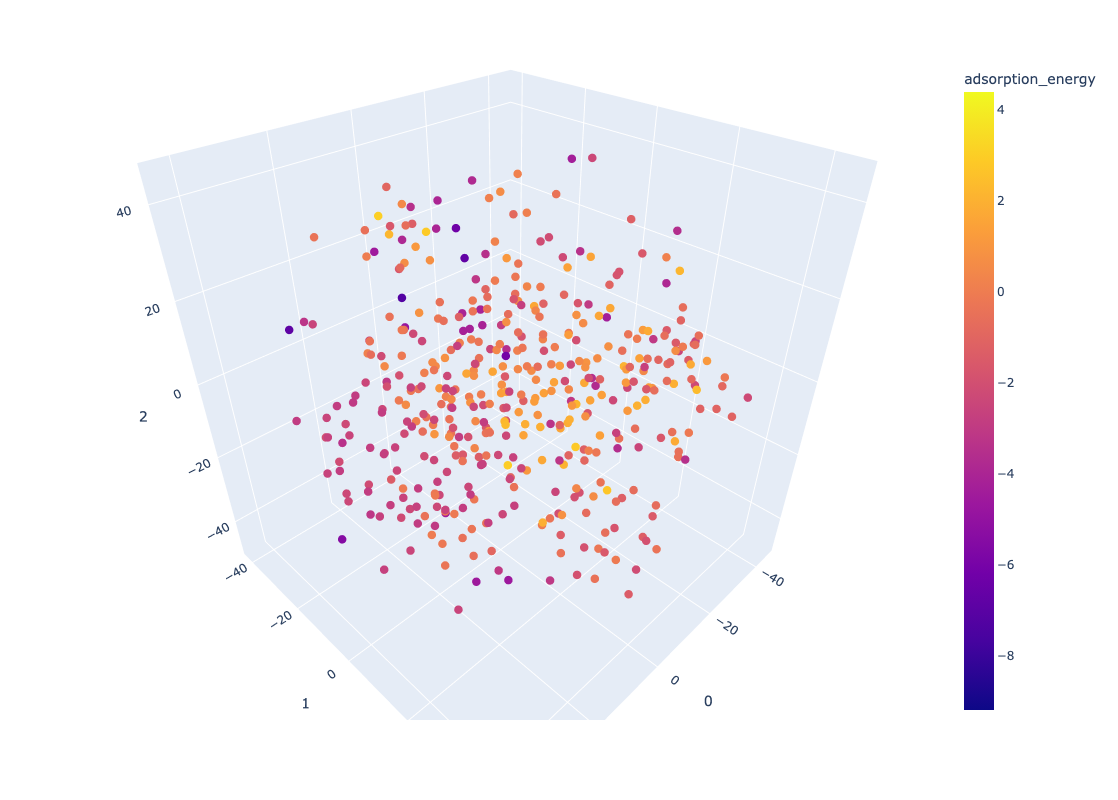

In [21]:
fig2.update_traces(marker=dict(size=5))

In [9]:
from umap import UMAP

umap_2d = UMAP(n_components=2, init='random', random_state=0)
umap_3d = UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1, 
    color = data_1['adsorption_energy'], labels={'color':'adsorption_energy'},
    width=800, height=600
)

fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color = data_1['adsorption_energy'], labels={'color':'adsorption_energy'},
    width=800, height=600
)

/Users/kyogonagashima/miniconda3/envs/csci373/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/kyogonagashima/miniconda3/envs/csci373/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



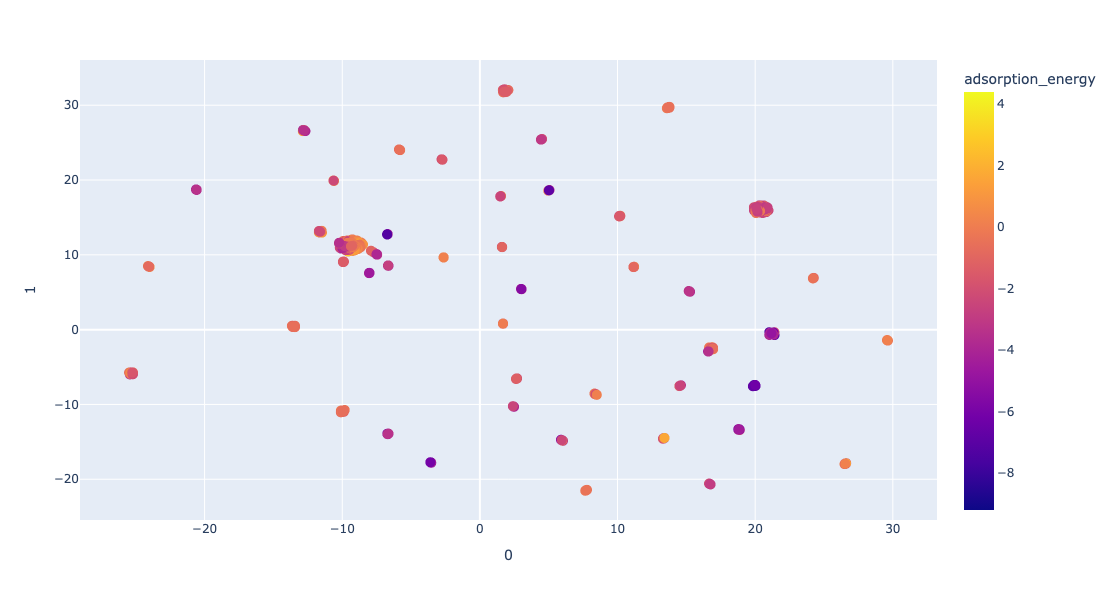

In [10]:
fig_2d.update_traces(marker=dict(size=10))

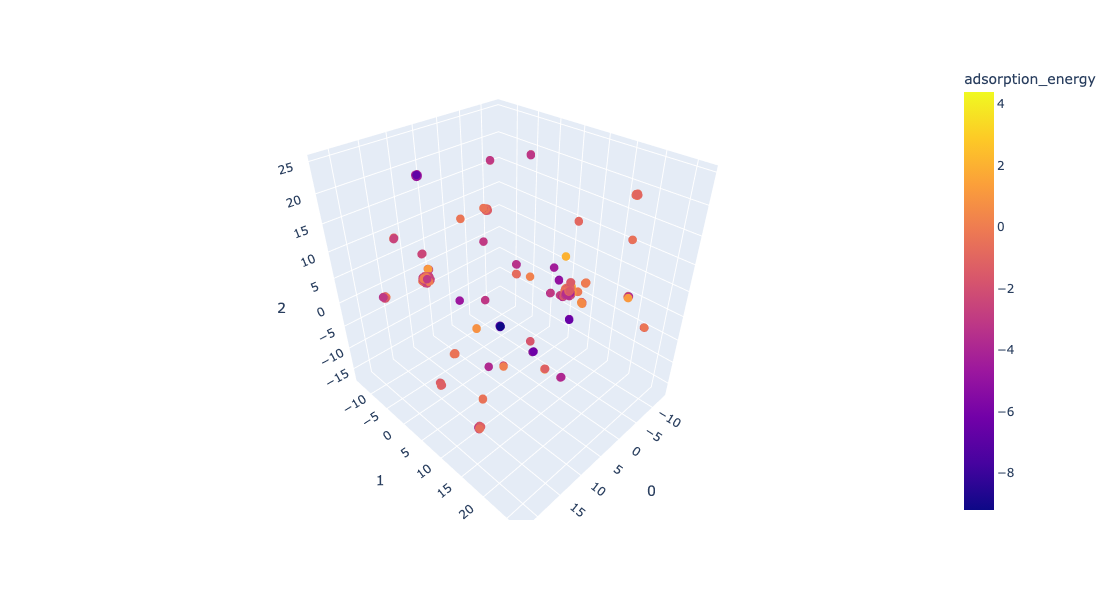

In [11]:
fig_3d.update_traces(marker=dict(size=5))

# Dataset_2

In [12]:
data_2 = pd.read_csv('dataset_2.csv')

In [13]:
data_2 = one_hot(data_2)
data_2 = scale_dataset(data_2)
data_2.head()

adsorption_energy  fraction  adsorbate_num_atoms  atomic_num_1  \
0              -4.29  0.750075             0.000000           0.0   
1              -0.56  0.750075             0.045455           0.0   
2              -3.14  0.500150             0.000000           0.0   
3              -0.50  0.500150             0.045455           0.0   
4              -1.67  0.750075             0.045455           0.0   

   atomic_num_2  atomic_num_3  atomic_num_4  atomic_num_5  atomic_num_6  \
0             0             0             0           0.0           0.0   
1             0             0             0           0.0           0.0   
2             0             0             0           0.0           0.0   
3             0             0             0           0.0           0.0   
4             0             0             0           0.0           0.0   

   atomic_num_6.1  ...  Substrate_Symmetry_2x2  Substrate_Symmetry_2x3  \
0             0.0  ...                     1.0                     0.0   
1             0.0  ...                     1.0                     0.0   
2             0.0  ...                     0.0                     0.0   
3             0.0  ...                     0.0                     0.0   
4             0.0  ...                     0.0                     0.0   

   Substrate_Symmetry_2x4  Substrate_Symmetry_3x2  Substrate_Symmetry_3x3  \
0                     0.0                     0.0                     0.0   
1                     0.0                     0.0                     0.0   
2                     0.0                     1.0                     0.0   
3                     0.0                     1.0                     0.0   
4                     0.0                     0.0                     0.0   

   Substrate_Symmetry_4x2  Substrate_Symmetry_4x4  Substrate_Symmetry_c(2x2)  \
0                     0.0                     0.0                        0.0   
1                     0.0                     0.0                        0.0   
2                     0.0                     0.0                        0.0   
3                     0.0                     0.0                        0.0   
4                     1.0                     0.0                        0.0   

   Substrate_Symmetry_c(4x4)  Substrate_Symmetry_√3x√3  
0                        0.0                       0.0  
1                        0.0                       0.0  
2                        0.0                       0.0  
3                        0.0                       0.0  
4                        0.0                       0.0  

[5 rows x 601 columns]

In [14]:
from sklearn.manifold import TSNE

features = data_2.drop("adsorption_energy", axis='columns')  

tsne = TSNE(n_components = 2, random_state = 0)
projections = tsne.fit_transform(features)

fig3 = px.scatter(
    projections, x=0, y=1,
    color = data_2['adsorption_energy'], labels={'color':'adsorption_energy'},
    width=1000, height=650
)             

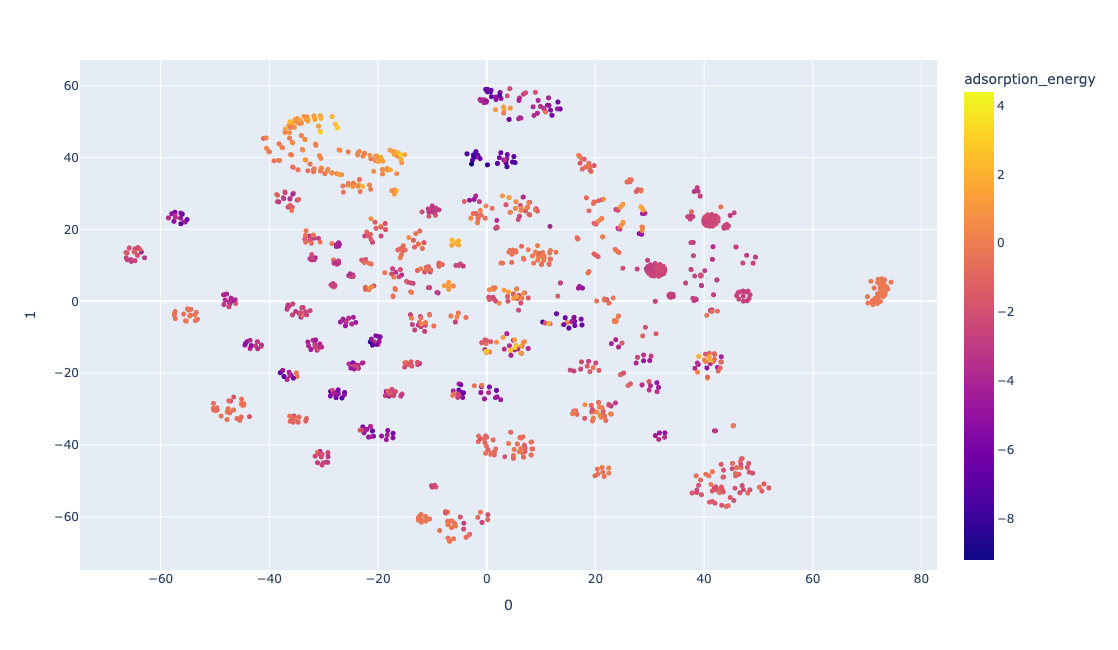

In [15]:
fig3.update_traces(marker=dict(size=5))

In [16]:
tsne = TSNE(n_components = 3, random_state = 0)
projections = tsne.fit_transform(features)

fig4 = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color = data_2['adsorption_energy'], labels={'color':'adsorption_energy'},
    width=1000, height=800
)             

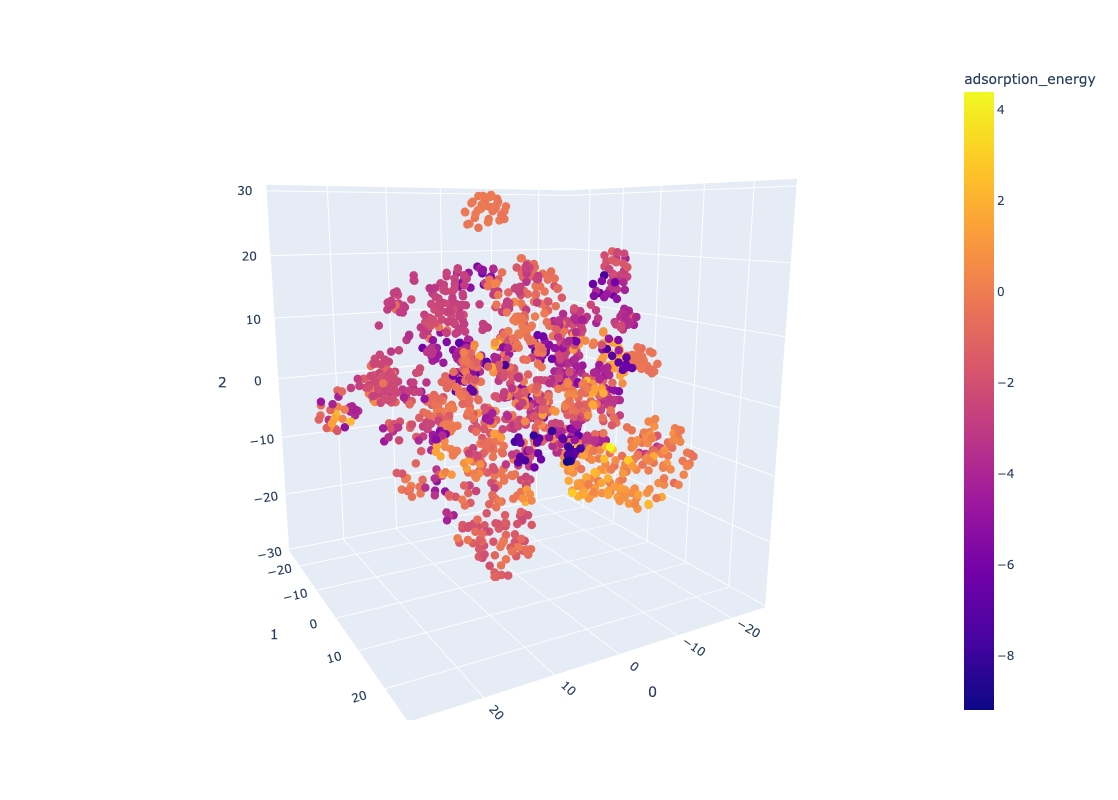

In [17]:
fig4.update_traces(marker=dict(size=5))

In [18]:
from umap import UMAP

umap_2d = UMAP(n_components=2, init='random', random_state=0)
umap_3d = UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1, 
    color = data_2['adsorption_energy'], labels={'color':'adsorption_energy'},
    width=800, height=600
)

fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color = data_2['adsorption_energy'], labels={'color':'adsorption_energy'},
    width=800, height=600
)

/Users/kyogonagashima/miniconda3/envs/csci373/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/kyogonagashima/miniconda3/envs/csci373/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



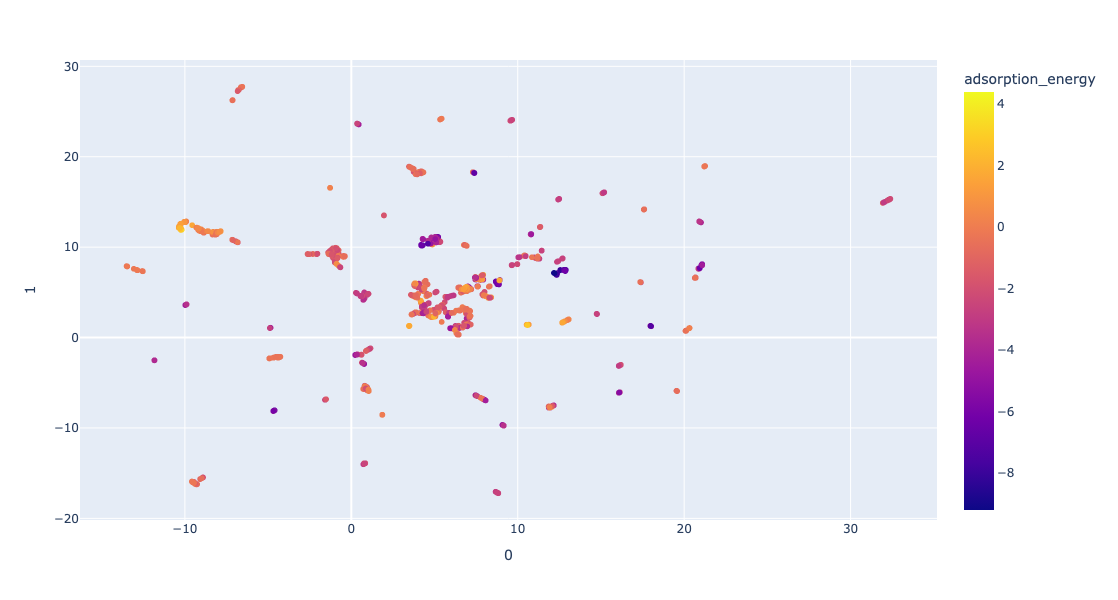

In [19]:
fig_2d.show()

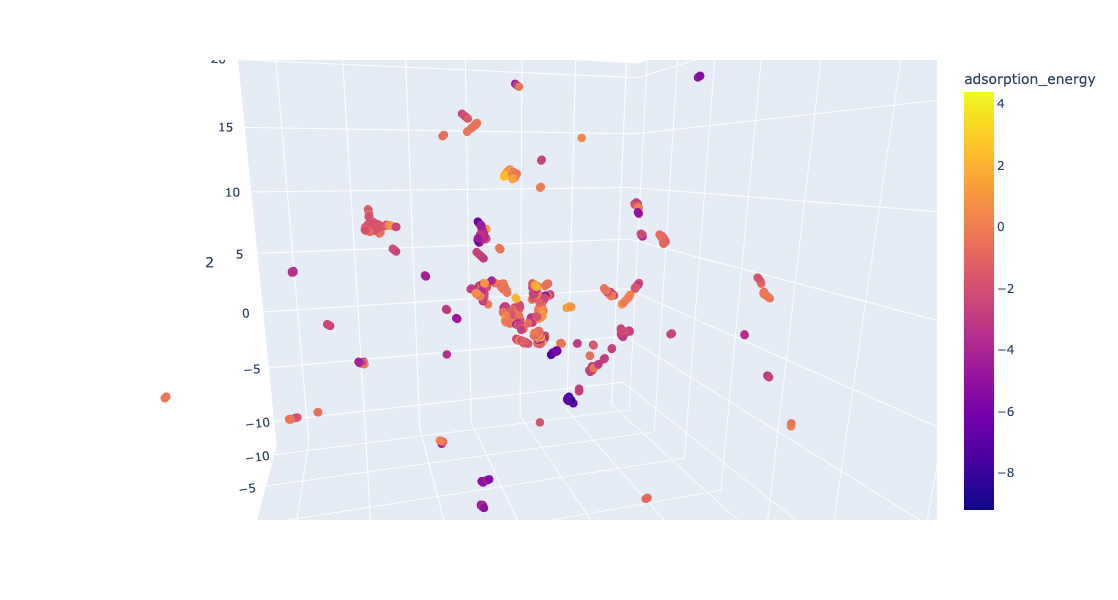

In [20]:
fig_3d.update_traces(marker=dict(size=5))